<a href="https://colab.research.google.com/github/Anjalikhillare/Mobile-Price-Range-Prediction/blob/main/Capstone_Project_3_Mobile_Price_Range_Prediction/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Mobile Price Range Prediction**
Project Type - Classification

Contribution - Individual

Team Member 1 -Anjali Khillare




#**Problem Statement**

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.


#**Project Summary**
 
The crucial component of marketing and business is cost prediction and same process can be used to estimate costs for all products such as cars,food, medication, laptops, etc.
Finding the ideal product (with the lowest price and highest features) is the best marketing strategy. As a result, products can be contrasted based on factors like specification, price, manufacturer, etc.
A decent product can be recommended to a customer by identifying their price range.Using several machine learning algorithms,mobile price prediction system is created in the following project. This project will categorise the mobile price range.The dataset's price range will be covered.With the help of the ML algorithms, mobile pricing categorization has been trained. This model categorises the selection of mobile devices based on several features, including camera, cores, battery,internal memory, battery capacity, etc.Graphs has been used to compare all the models after training them with different techniques.

**Future Scope**

To improve accuracy and anticipate the price of the products accurately, more advanced artificial intelligence algorithms can be applied.

Market price forecasting software or mobile applications can be created for any newly released product.

The data collection should be expanded in order to maximise accuracy and provide predictions that are more precise. 

Additionally, using more accurate features can improve accuracy. Therefore, to increase accuracy, the data collection should be big and more useful attributes should be chosen.


#**GitHub Link**

#**Data Description**

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_heig Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1 (medium cost), 2(high cost) and 3(very high cost)

#**Flow Chart**

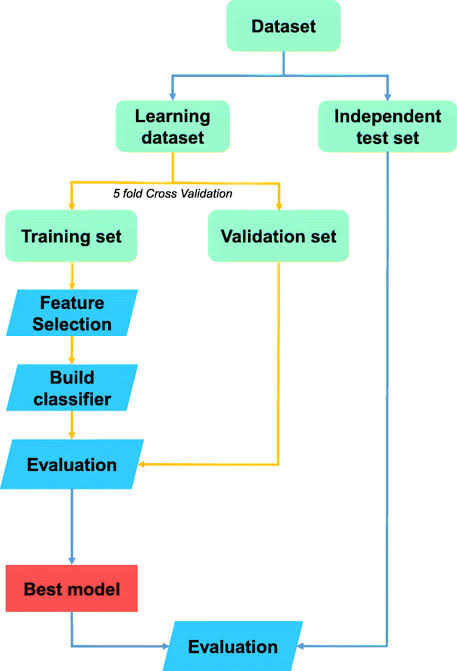

#**Importing Libraries**

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble  import  BaggingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')
df = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

#**Data Summarization**

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
# Dataset Rows & Columns count
df.count()
print(df.head())
 
# obtaining the shape
print("shape of dataframe", df.shape)
 
# obtaining the number of rows
print("# of rows : ", df.shape[0])
 
# obtaining the number of columns
print("# of columns : ", df.shape[1])

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
# % of null values in each column
round(df.isnull().sum()/len(df.index)*100)

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [10]:
# Duplicate Values
print(len(df[df.duplicated()]))

0


In [11]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Here it is observed that, minimum value of minimum value of sc_w and px_height cannot be zero.Let us see the count of those values ie, which equals to zero.

In [55]:
# Count of mobiles with sc_w = 0
print(len(df[df.sc_w == 0]))
# Count of mobiles with px_height = 0
print(len(df[df.px_height == 0]))

0
0


In [56]:
# Assigning mean values to sc_W and px_height for their zero values
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [57]:
# Revised count of mobiles for sc_w and px_height
print(len(df[df.sc_w == 0]))
print(len(df[df.px_height == 0]))

0
0


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.500,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.000,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.000,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.500,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.000,7.00,8.0


Here the mean value changed for both px_height and sc_w

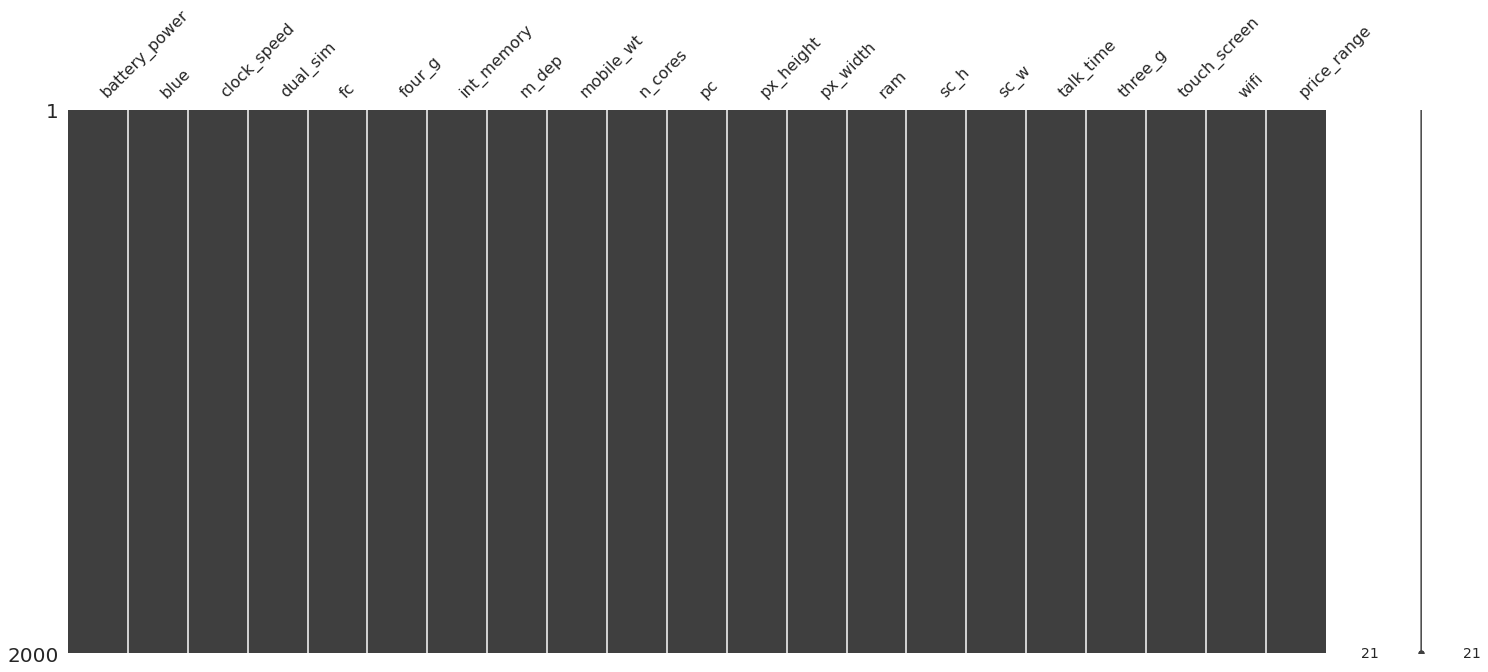

In [58]:
# Missing Values
import missingno as msno
msno.matrix(df)

Check outliers and  skewness of data

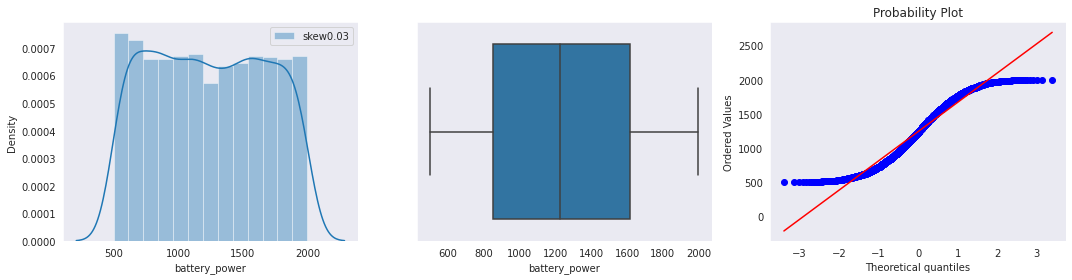

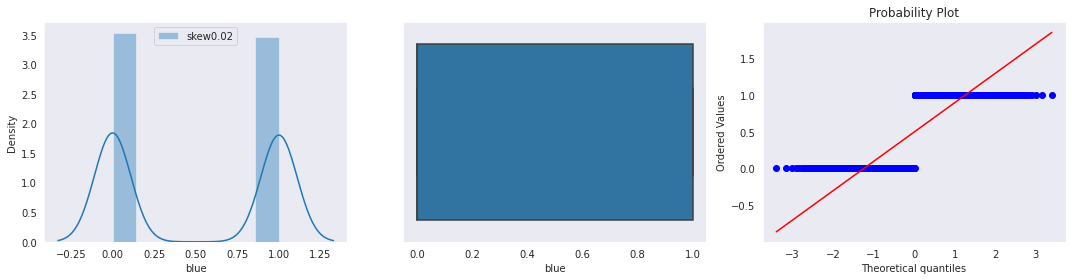

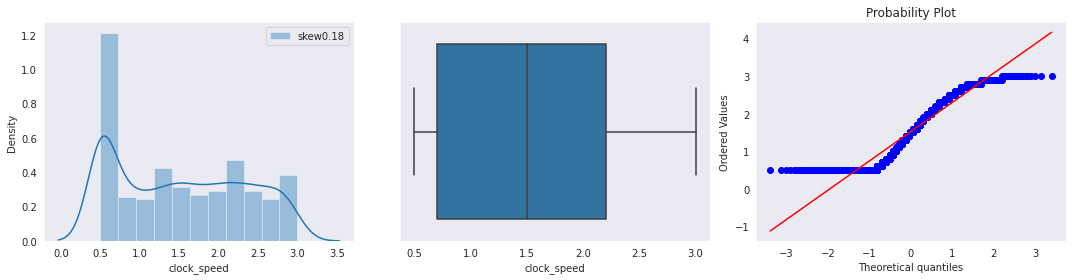

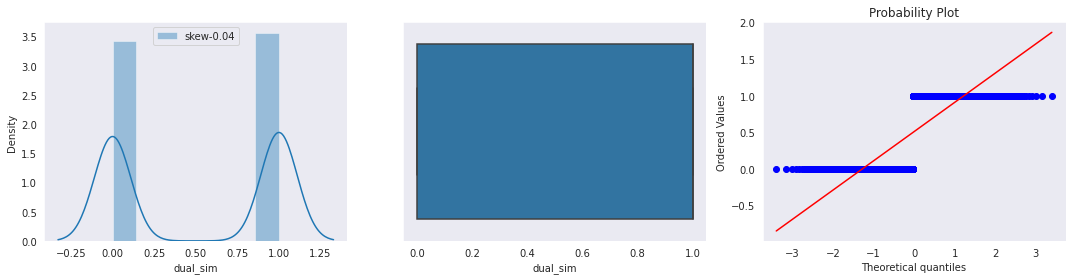

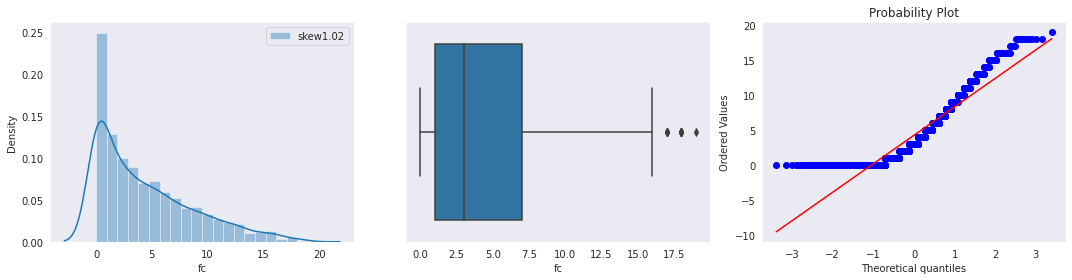

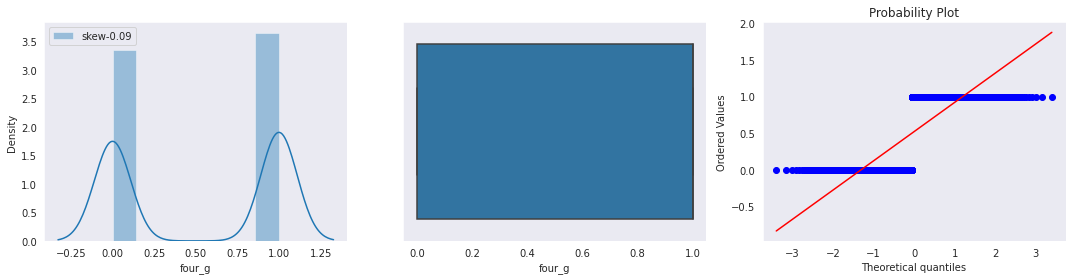

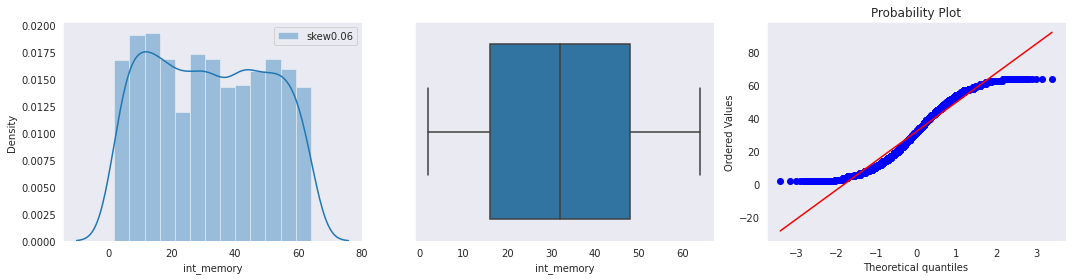

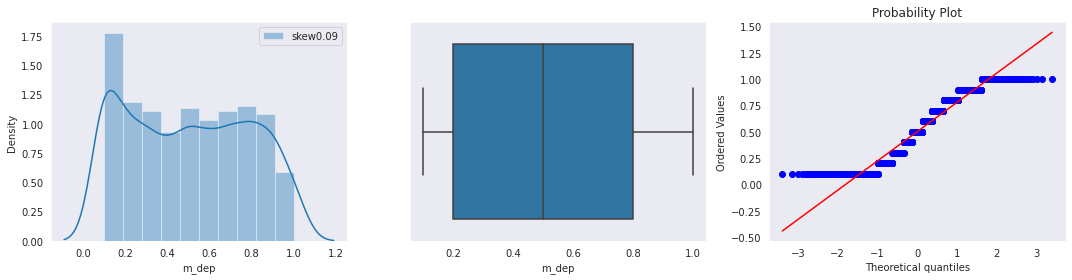

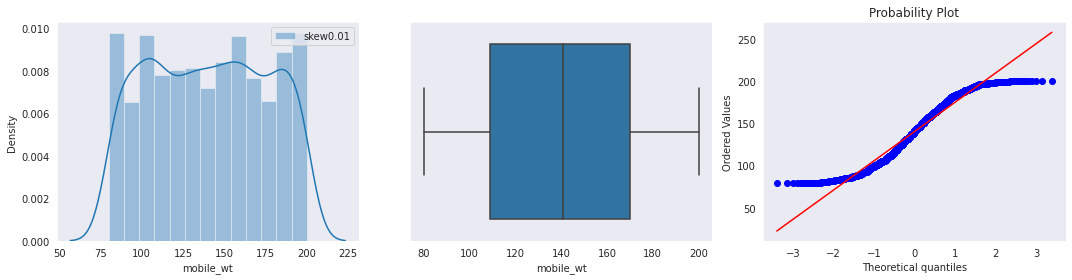

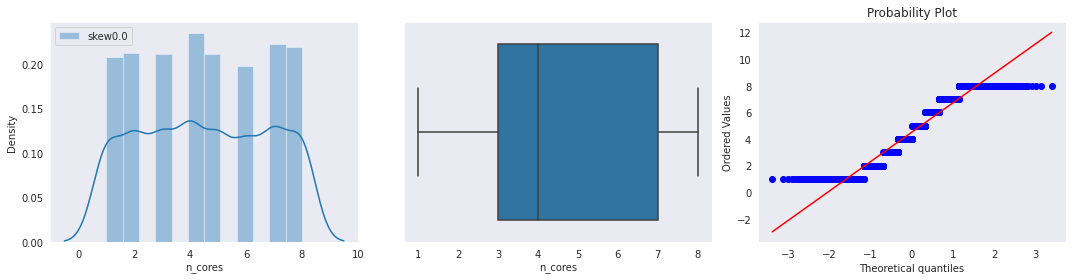

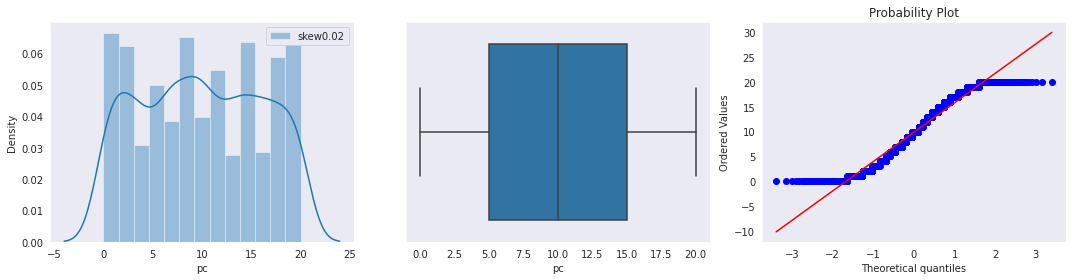

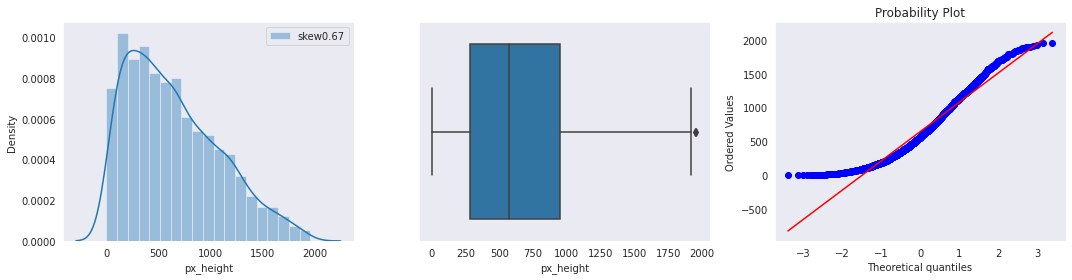

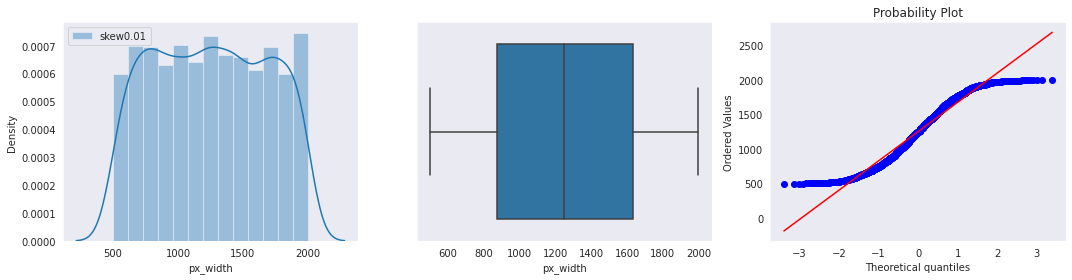

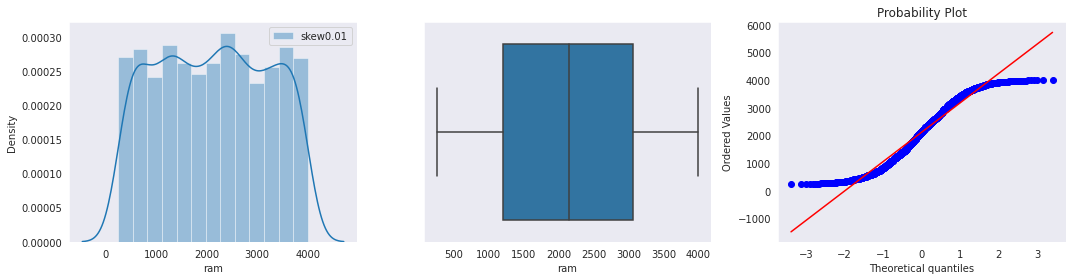

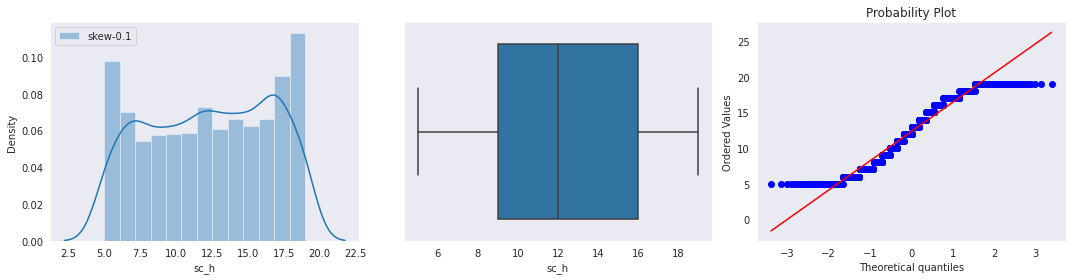

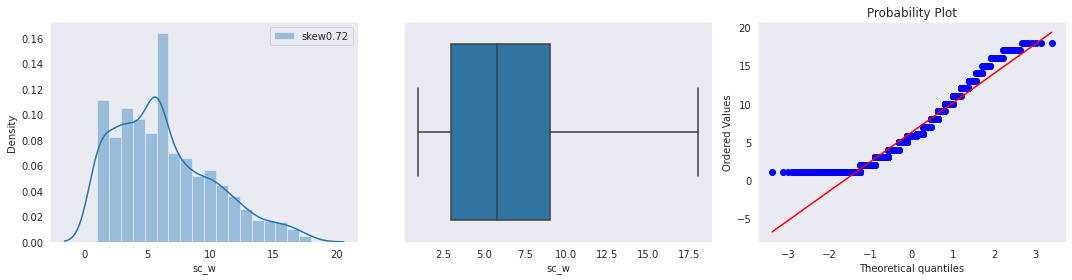

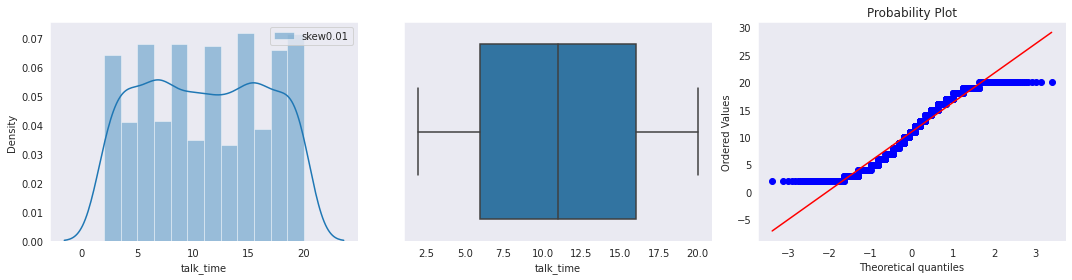

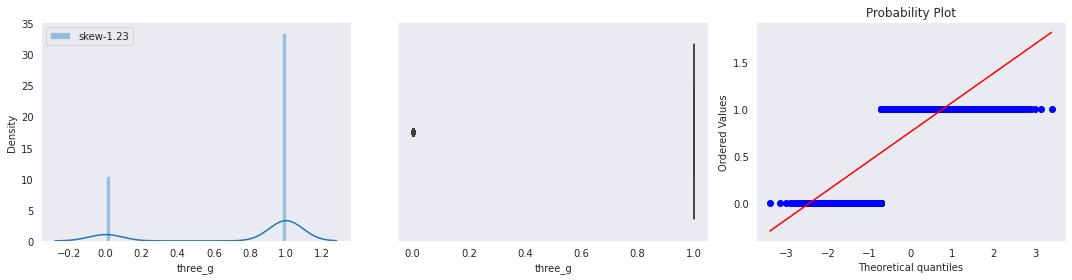

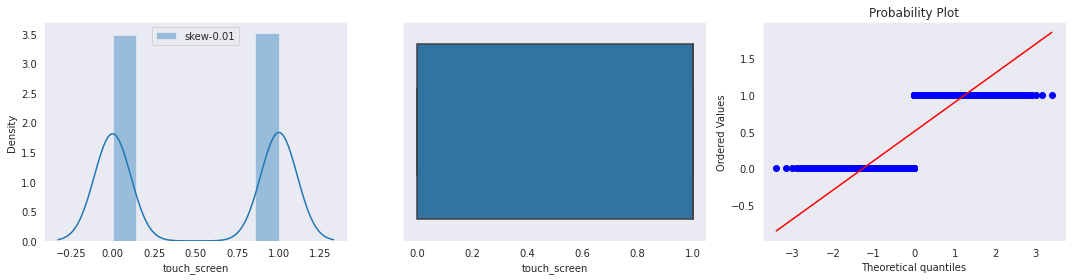

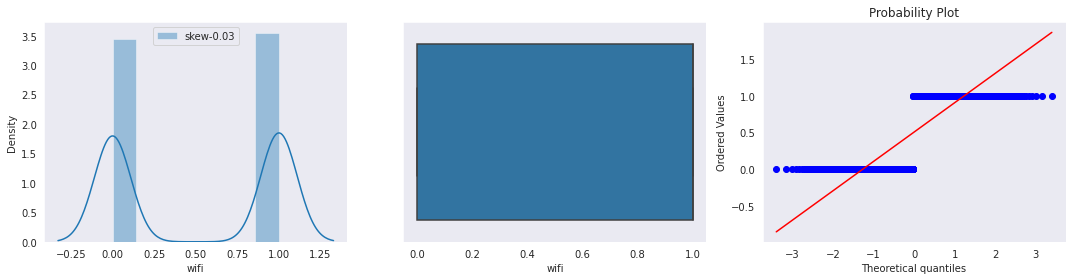

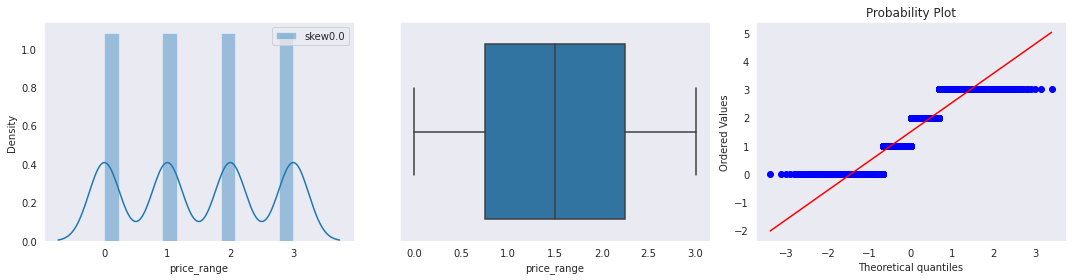

In [31]:
from scipy import stats
sns.set_style('dark')
for col in df.describe().columns:
  plt.figure(figsize=(15,4))
  # Distribution
  plt.subplot(131)
  sns.distplot(df[col], label="skew" + str(np.round(df[col].skew(), 2)))
  plt.legend()
  # Boxplot - outliers
  plt.subplot(132)
  sns.boxplot(df[col])
  # probability plot
  plt.subplot(133)
  stats.probplot(df[col], plot=plt)
  plt.tight_layout()
  plt.show()

In [59]:
# Categorizing dataset into numerical and categorical data
from locale import D_FMT
df_num = df[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_width','px_height','ram', 'sc_h', 'talk_time','sc_w']]

df_cat = df[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

In [60]:
#Using IQR method for removal of outliers
def outlinefree(dataCol):     
      
    sorted(dataCol)                          
    Q1,Q3 = np.percentile(dataCol,[25,75])   
    IQR = Q3-Q1                              
    LowerRange = Q1-(1.5 * IQR)              
    UpperRange = Q3+(1.5 * IQR)              
    
    colname = dataCol.tolist()              
    newlist =[]                              
    for i in range(len(colname)):
        
        if colname[i] > UpperRange:          
            colname[i] = UpperRange          
            newlist.append(colname[i])       
        elif colname[i] < LowerRange:        
            colname[i] = LowerRange        
            newlist.append(colname[i])       
        else:
            colname[i]                       
            newlist.append(colname[i])   
            
        

    return newlist

In [37]:
for i in range(len(df_num.columns)):
    new_list =  outlinefree(df.loc[:,df_num.columns[i]]) # retrun new list
    df.loc[:,df_num.columns[i]] = new_list  

In [39]:
df_final_num = df[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

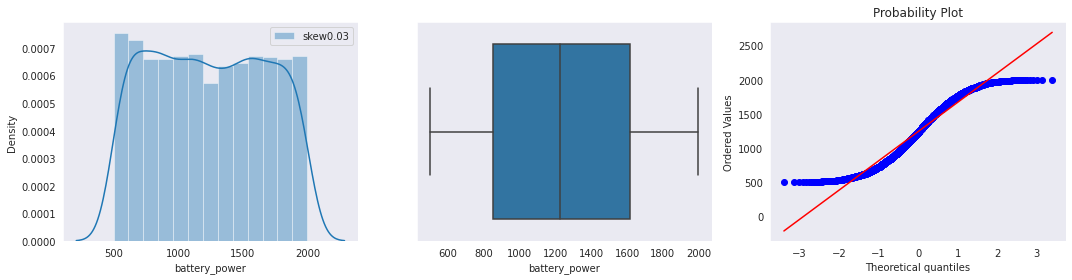

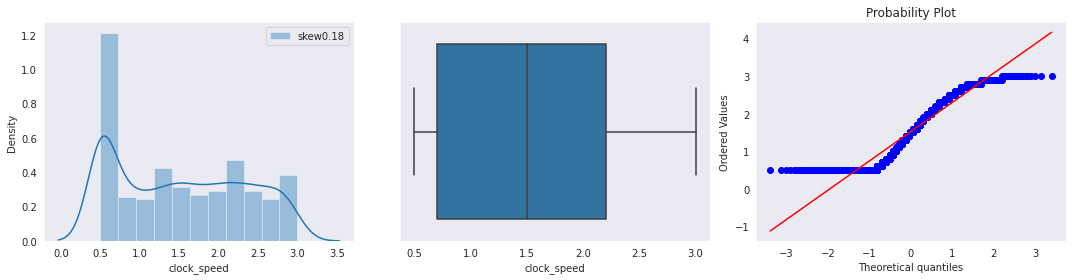

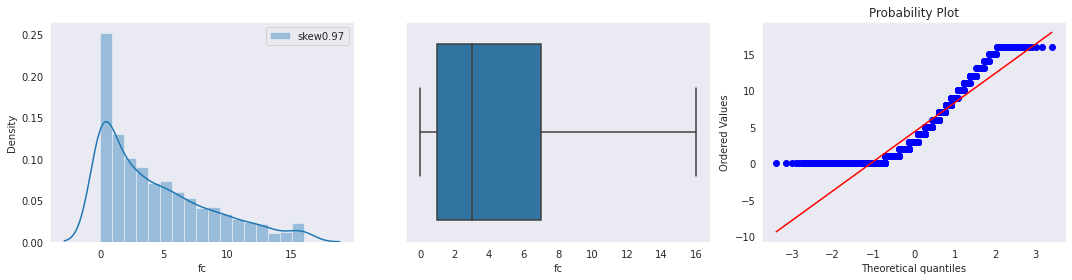

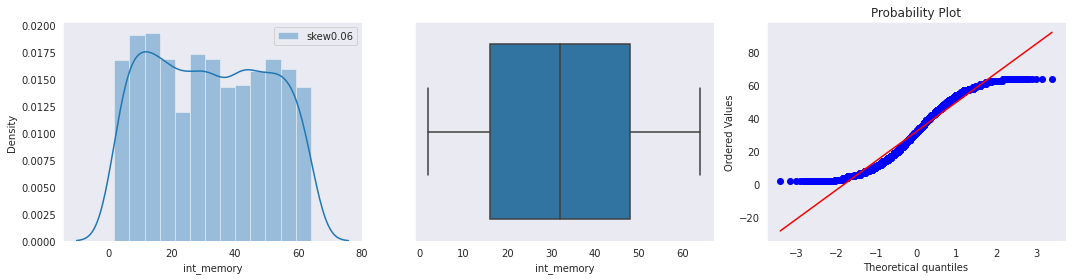

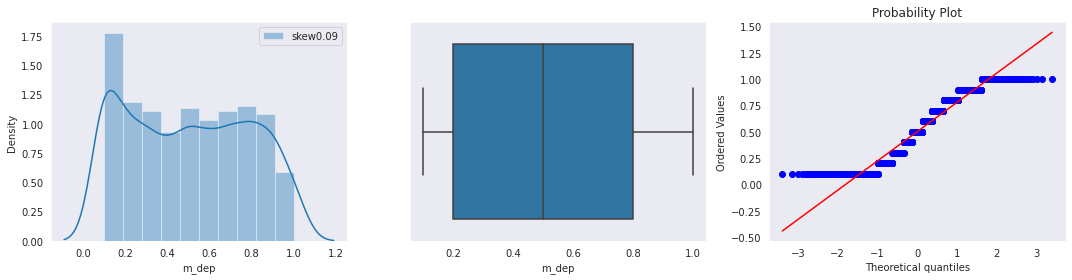

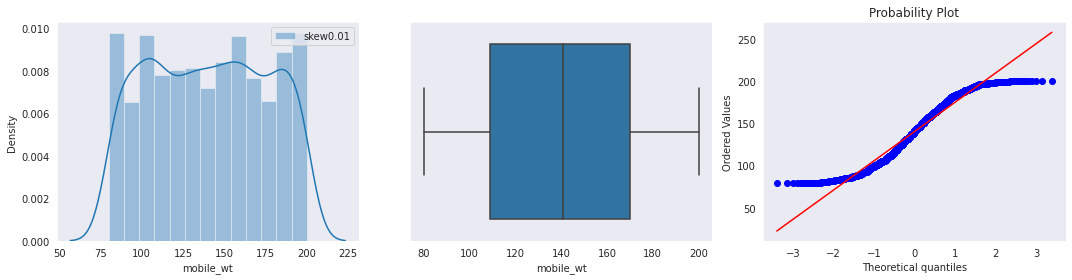

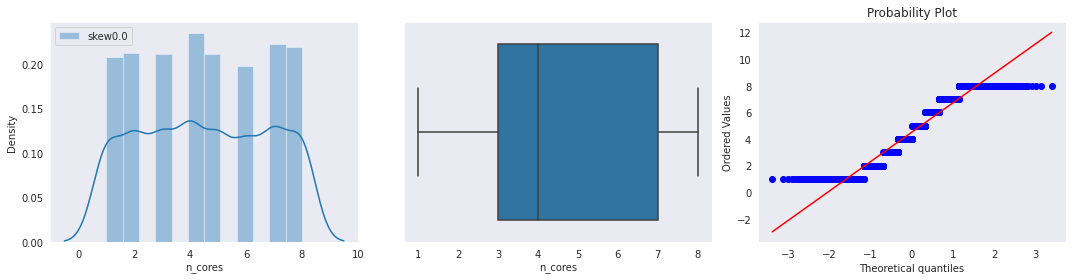

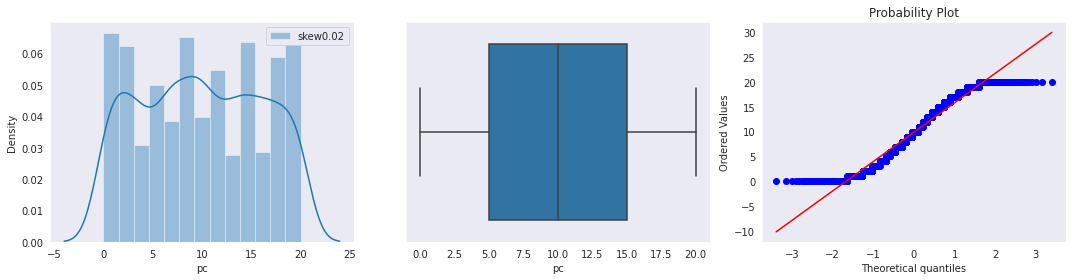

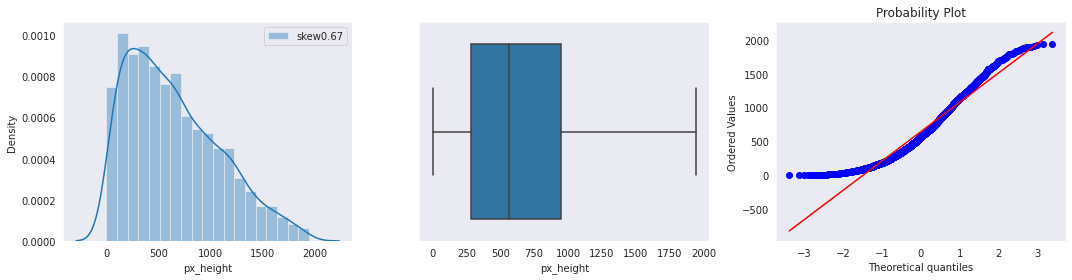

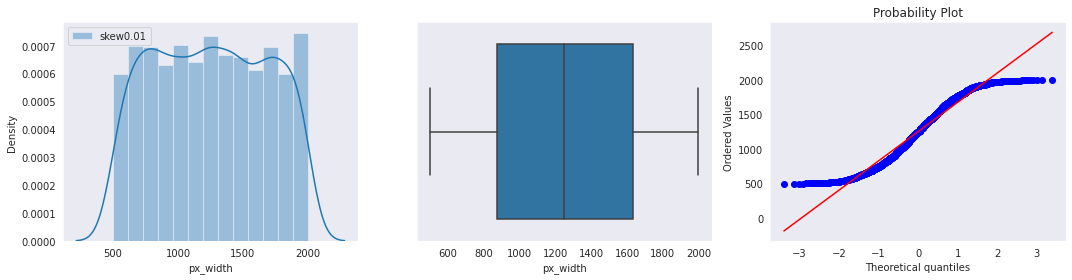

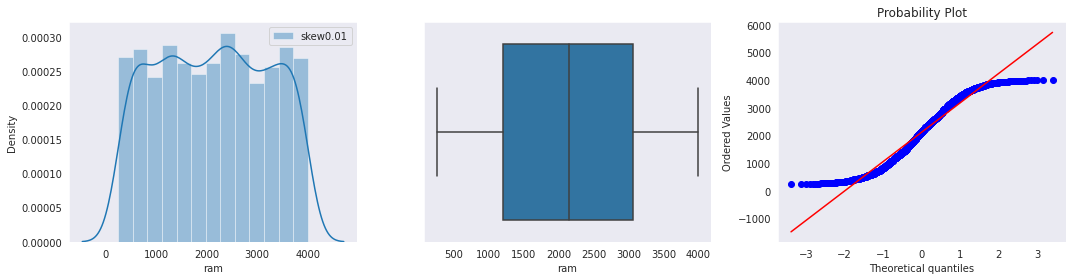

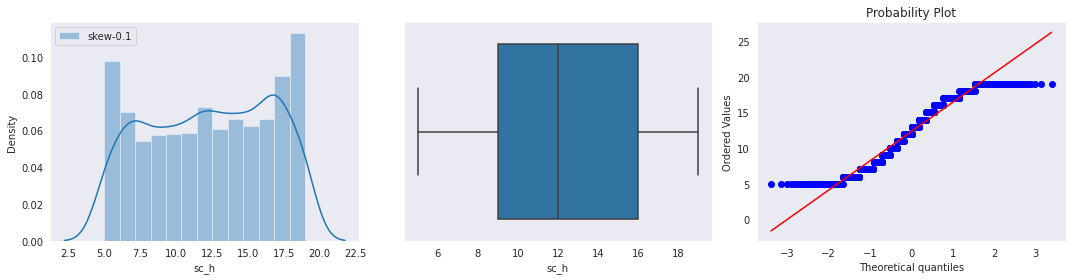

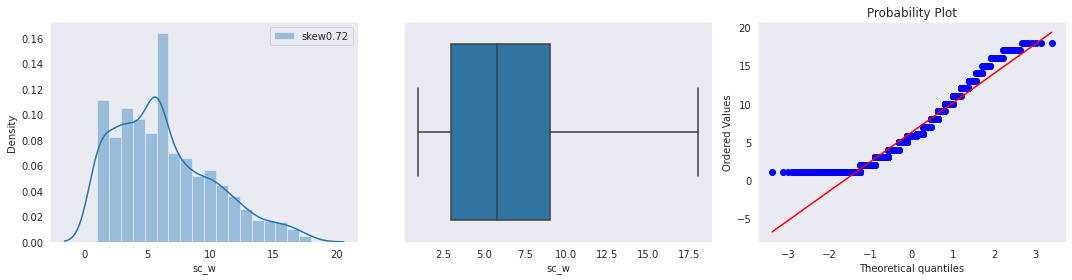

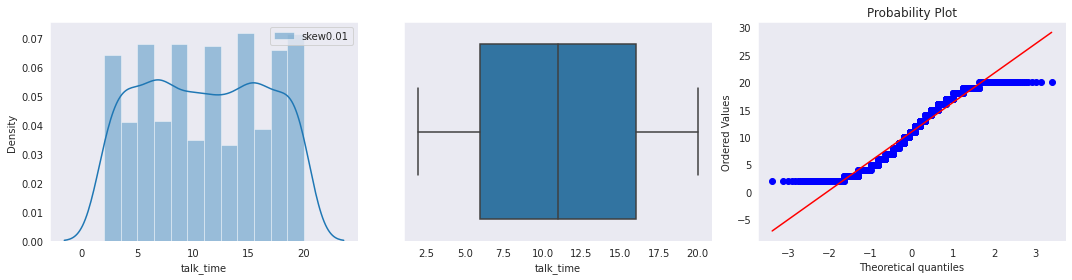

In [44]:
sns.set_style('dark')
for col in df_final_num.describe().columns:
  plt.figure(figsize=(15,4))
  # Distribution
  plt.subplot(131)
  sns.distplot(df_final_num[col], label="skew" + str(np.round(df_final_num[col].skew(), 2)))
  plt.legend()
  # Boxplot - outliers
  plt.subplot(132)
  sns.boxplot(df[col])
  # probability plot
  plt.subplot(133)
  stats.probplot(df[col], plot=plt)
  plt.tight_layout()
  plt.show()

From the boxplot we can observe that ouliers has been removed.

#**Exploratory Data Analysis**

**Univariate Analysis**

So our taregt variable price_range has 4 classes.Let us see those classes.

Price range is in four classes [1 2 3 0]


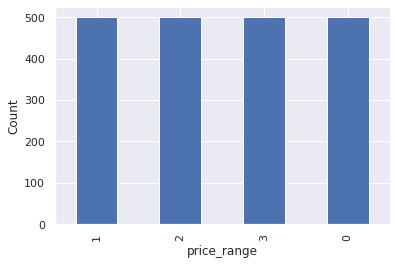

In [45]:
print('Price range is in four classes',df['price_range'].unique())
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range',rotation=0)
plt.ylabel('Count')
plt.show()

We define our target column as "y" and rest of the data which are used as inputs as "x"

In [47]:
y = df['price_range']
x = df.drop('price_range', axis = 1)

Let us see if our dataset is balanced or not

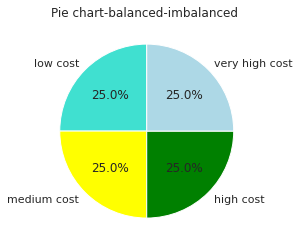

In [48]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = df['price_range'].value_counts().values
colors = ['turquoise','yellow','green','lightblue']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
ax1.set_title('Pie chart-balanced-imbalanced ')
plt.show()

**Plot of Categorical features**

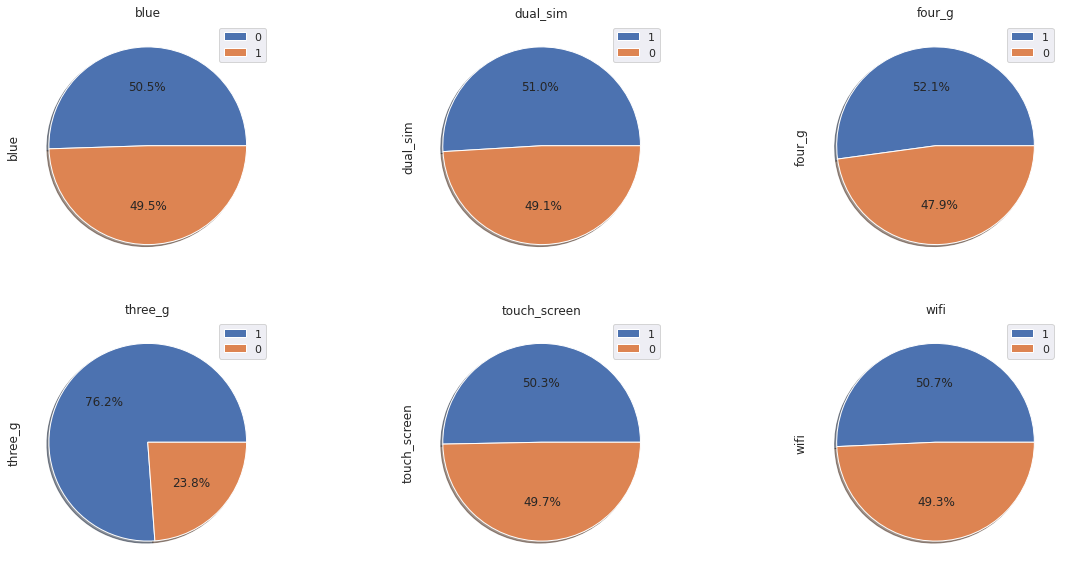

In [62]:
plt.figure(figsize=(20,10))
j=1
for i in df_cat.columns:
  plt.subplot(2, 3, j)
  j+=1
  df_cat[i].value_counts().plot.pie (autopct='%1.1f%%',shadow=True,labeldistance=None)
  plt.legend()
# plt.ylabel('')
  plt.title(i)

**Plot of Numerical Features**

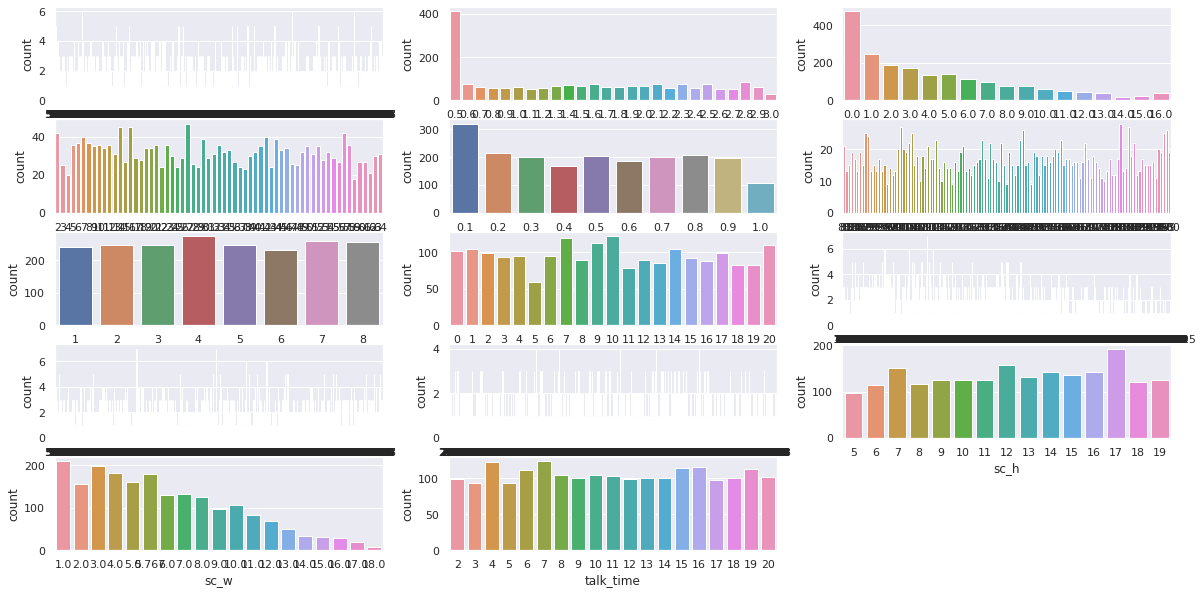

In [66]:
df_final_num = df[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]
plt.figure(figsize=(20,10))
j = 1
for i in df_final_num.columns:
  plt.subplot(5,3,j)
  sns.countplot(x=df[i])
 
  j=j+1

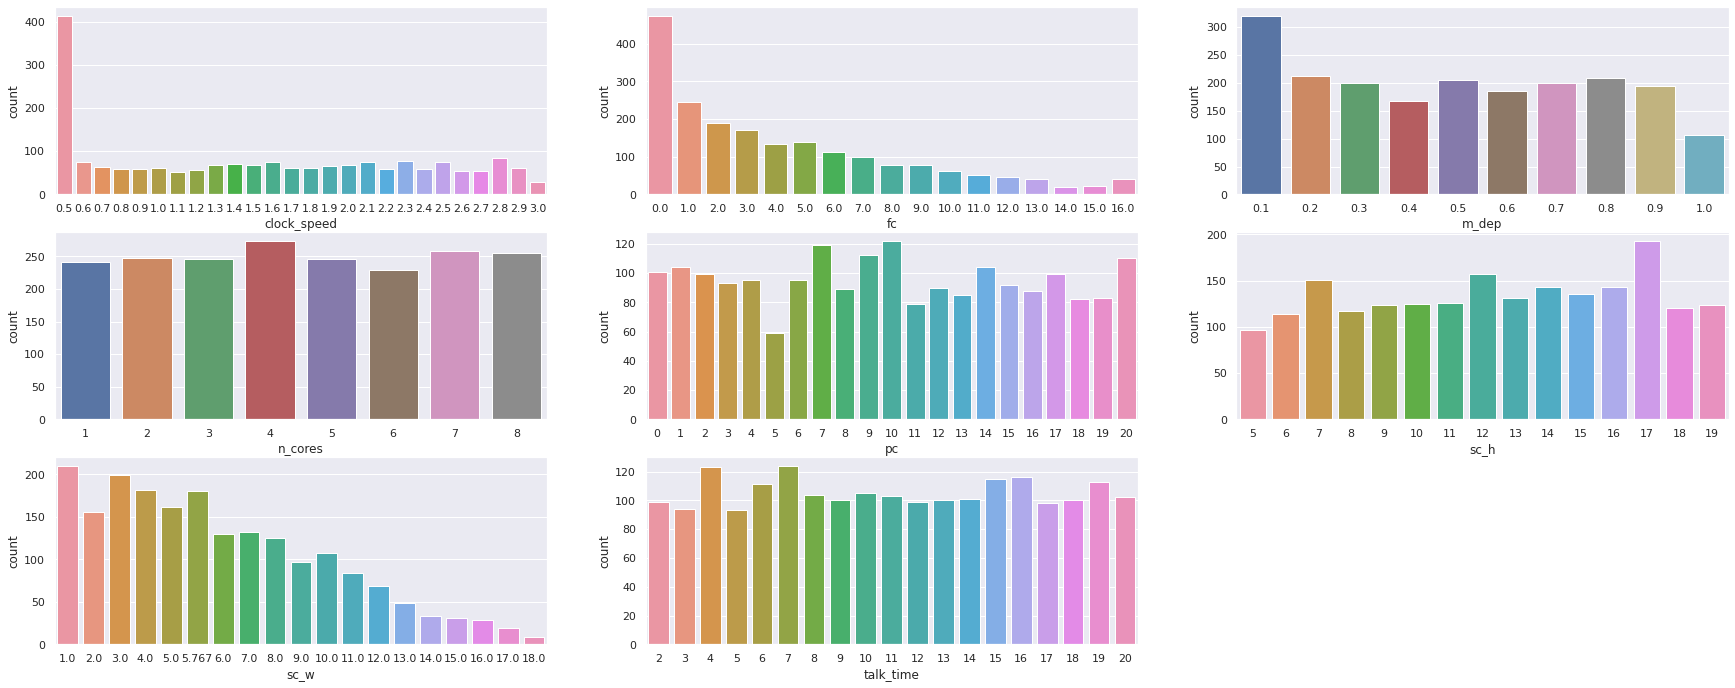

In [68]:
count_df = df[['clock_speed', 'fc','m_dep','n_cores','pc','sc_h', 'sc_w', 'talk_time']]
plt.figure(figsize=(30,20))
j = 1
for i in count_df.columns:
  plt.subplot(5,3,j)
  sns.countplot(x=df[i])
  j=j+1
 

**Bivariate Analysis**

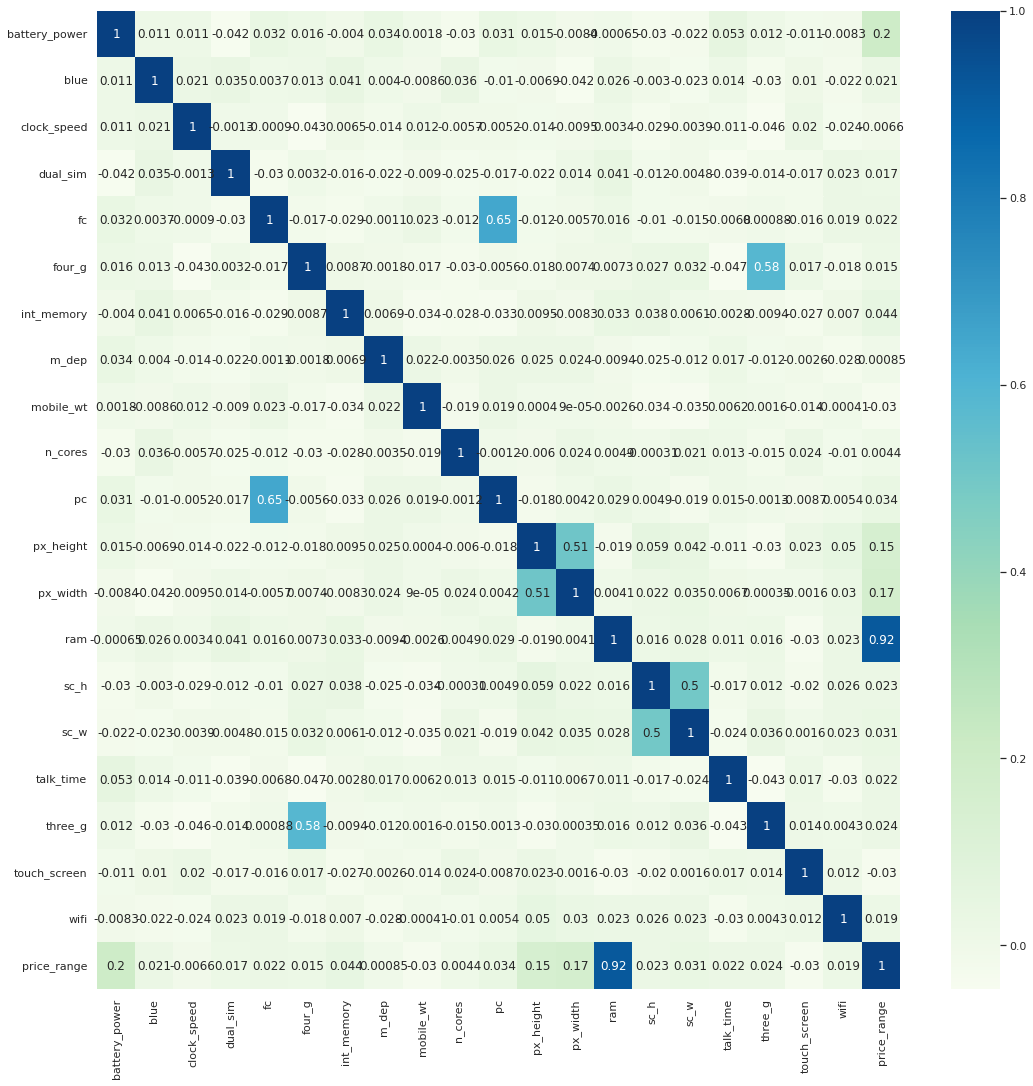

In [51]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='GnBu')
plt.show()

Conclusions from heatmap

Ram is the variable that has the most influence, as can be seen from the heatmap, while most other variables have very little relationship to price range.
Although there is a correlation between the primary camera's mega pixels and the front camera's mega pixels (which makes sense since both indicate the phone model's technology level of resolution), the price range is unaffected. Although 3G and 4G are moderately associated, our dataset does not contain any inputs that are strongly correlated, hence there is no multicollinearity issue.

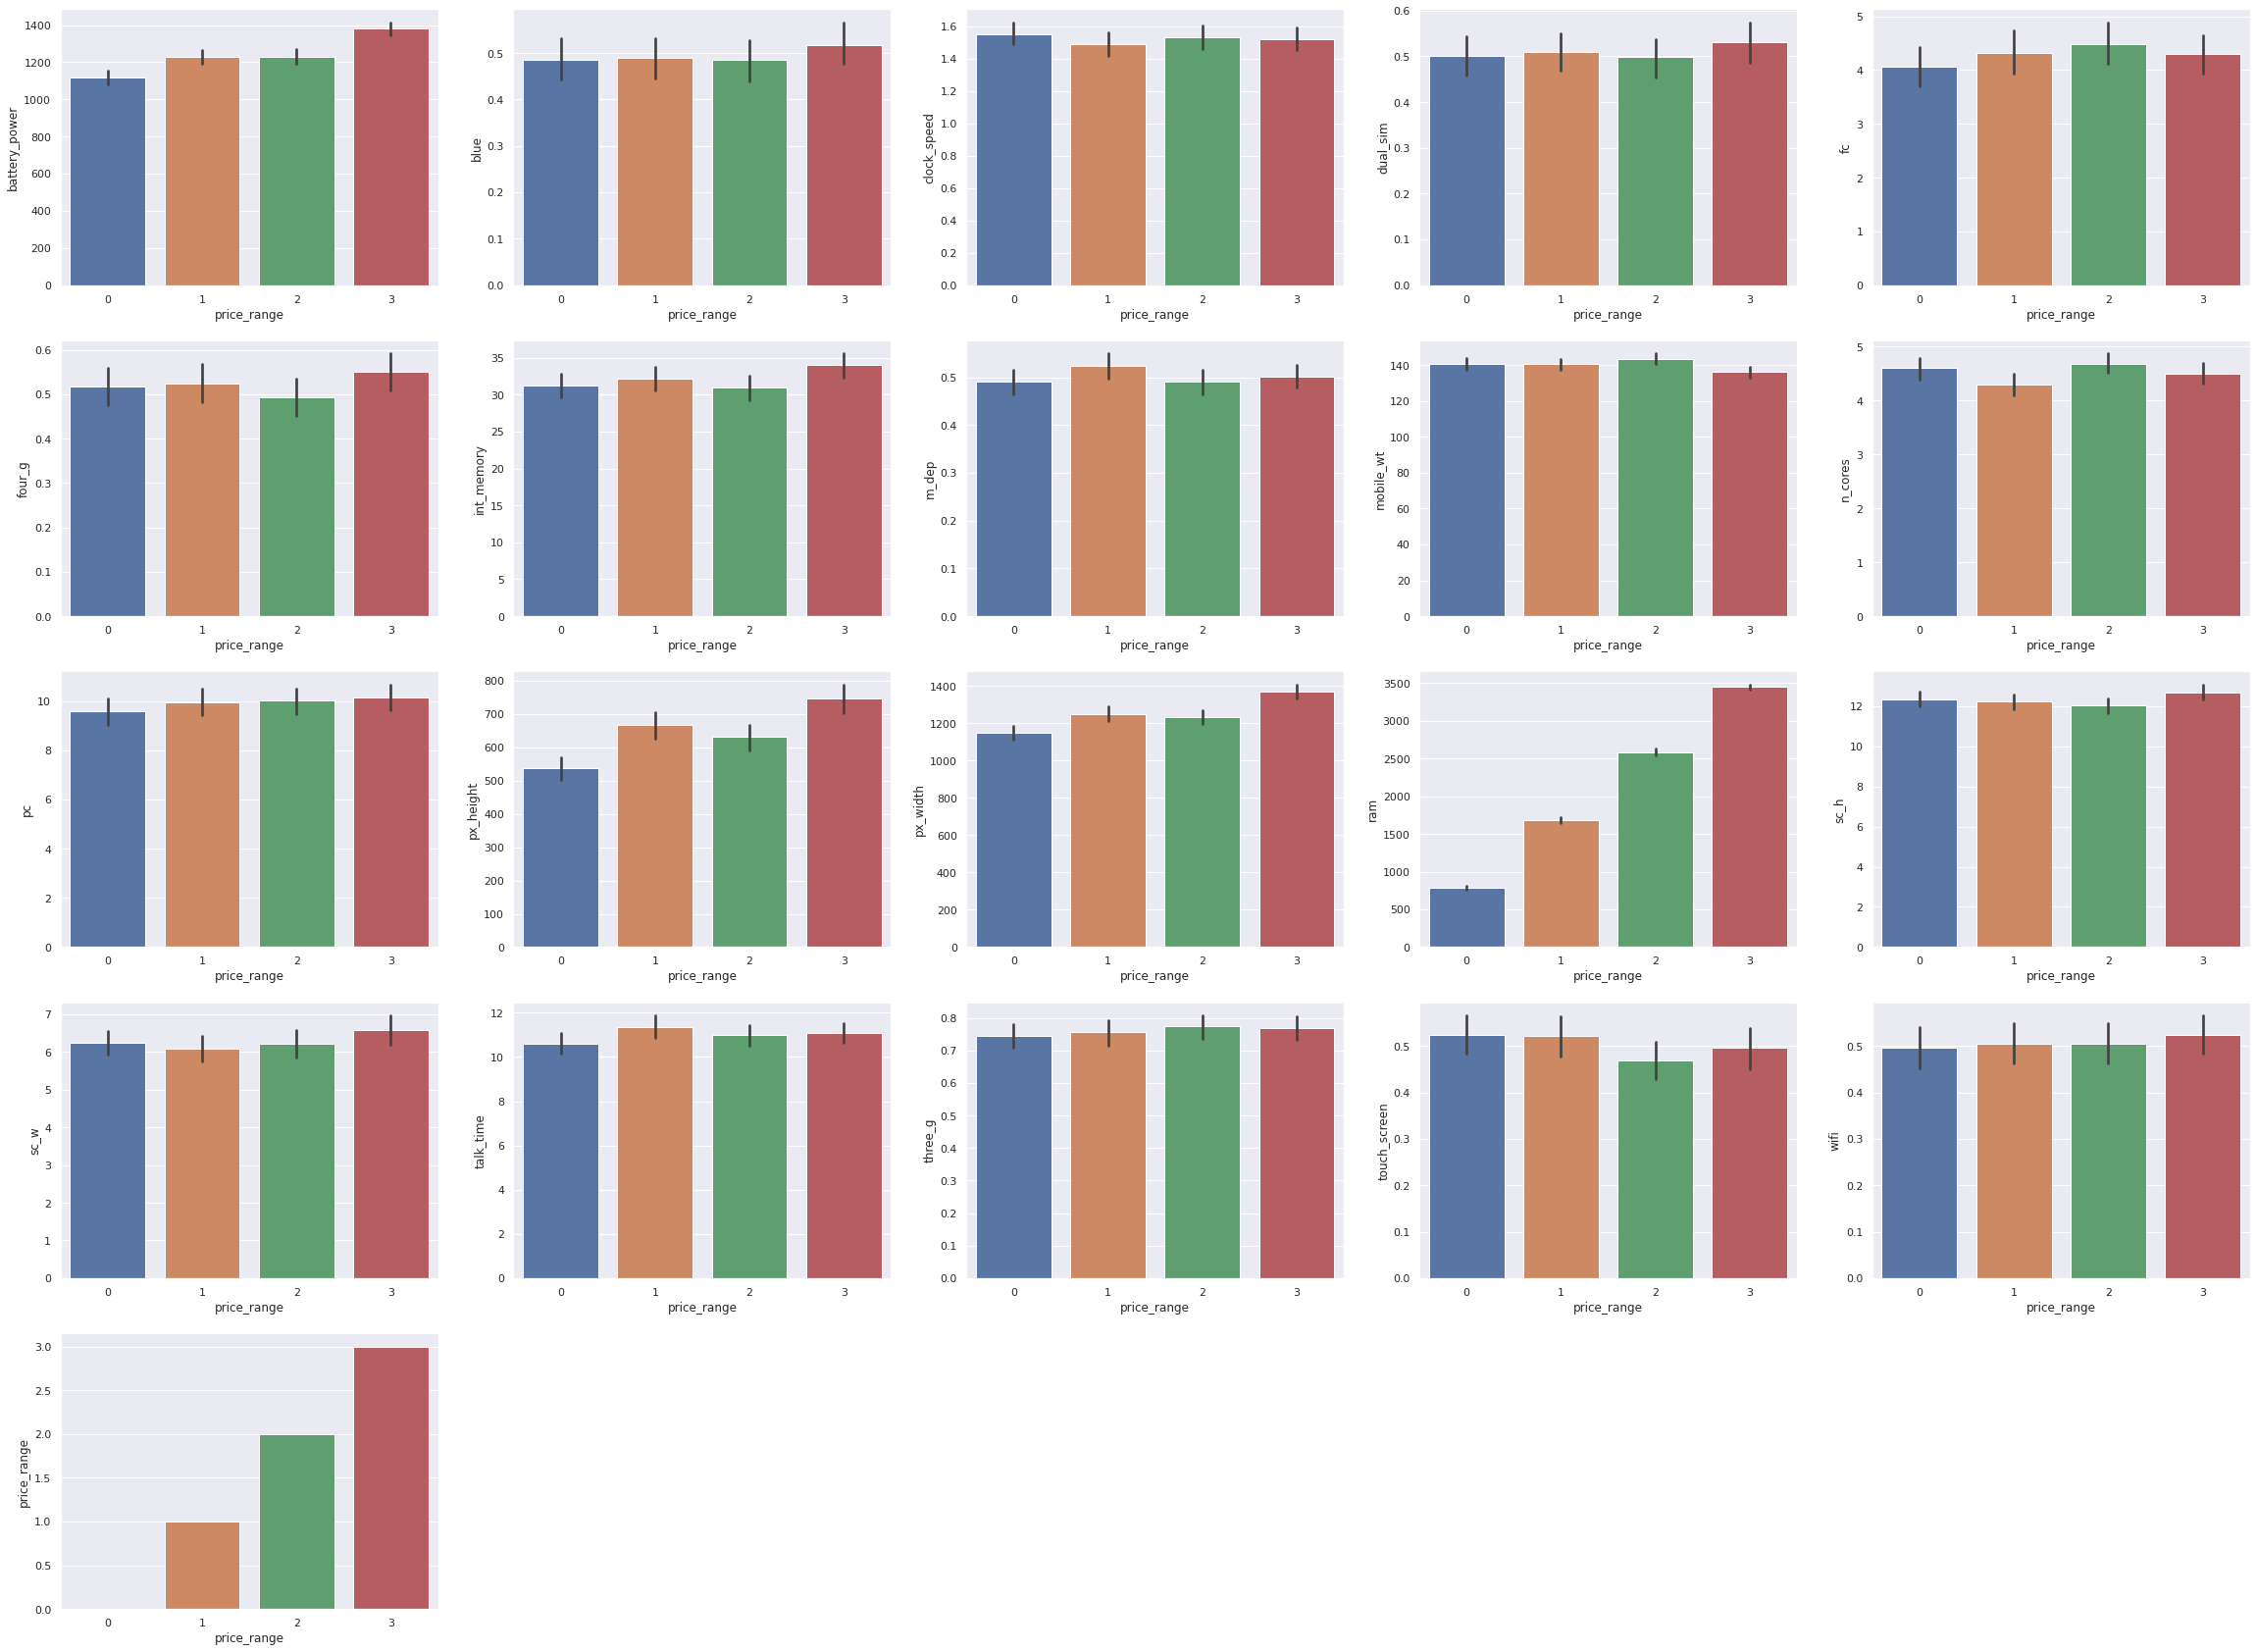

In [46]:
plt.figure(figsize=(40,30))
j = 1
for i in df.columns:
  plt.subplot(5,5,j)
  sns.barplot(x=df['price_range'],y=df[i])
  j=j+1

#**Feature Engineering**